In [1]:
import pandas as pd
from sklearn import linear_model

In [3]:
df=pd.read_csv(r'D:\Data analysis\My Project\Machine Learning\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df.drop(['Id'],axis=1,inplace=True)

In [20]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df['Species1']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [27]:
df.drop(['Species'],axis=1,inplace=True)

In [28]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


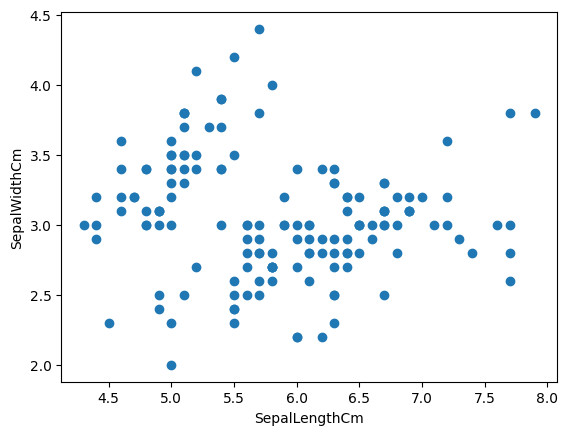

In [60]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=df['Species1']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
X_train.shape

(120, 4)

In [42]:
X_test.shape

(30, 4)

In [43]:
Lg=linear_model.LogisticRegression()

In [47]:
Lg.fit([X_train],y_train)

C:\Users\HP\anaconda3\anaconda 3 second\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions=Lg.predict(X_test)
predictions

array([2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 2, 1, 1, 0, 1, 0, 0], dtype=int64)

In [51]:
y_test.head()

134    2
36     0
55     1
120    2
27     0
Name: Species1, dtype: int64

In [52]:
Lg.score(X_test,y_test)

0.9666666666666667

In [53]:
import seaborn as sns
from sklearn import metrics

In [55]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]


<Axes: >

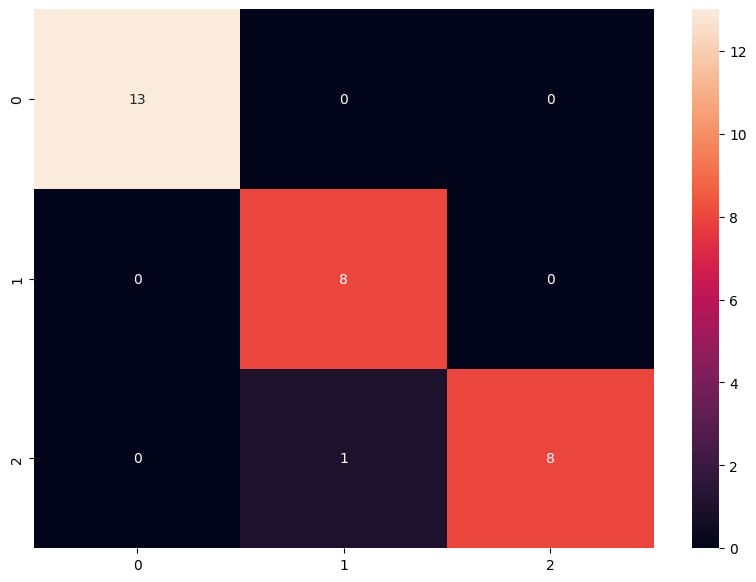

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)